<a href="https://colab.research.google.com/github/javierricaurtep/Apuntes-de-Curso-de-EDA/blob/main/Curso_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Primeros pasos

## Vamos a instalar nustras librerías y el dataset

In [ ]:
!pip install --upgrade pip
!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.6.0-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.4 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2


In [ ]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

In [ ]:
pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.6.2-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.4 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.0
    Uninstalling matplotlib-3.6.0:
      Successfully uninstalled matplotlib-3.6.0


## Vamos a configurar el estilo de nuestras gráficas

In [ ]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

island_color = {
    'Torgersen': '#ff6602ff',
    'Biscoe': '#0f7175ff',
    'Dream': '#c65dc9ff'
}

##Ahora vamos a cargar nuestro dataset

###Primero los datos "crudos"

In [ ]:
raw_penguins_df = palmerpenguins.load_penguins_raw()

###Ahora, los datos preprocesados

In [ ]:
preprocess_penguins_df = palmerpenguins.load_penguins()

#Limpieza y Validación de datos

##Observamos primero el tipo de datos de nuestras variables

In [ ]:
preprocess_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [ ]:
(
    preprocess_penguins_df
    .dtypes
    .value_counts()
)

float64    4
object     3
int64      1
dtype: int64

##También la cantidad de variables (columnas) y observaciones (filas)

In [ ]:
preprocess_penguins_df.shape

(344, 8)

##Luego vamos a analizar nuestros valores nulos

In [ ]:
(
    preprocess_penguins_df
    .isnull()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

In [ ]:
(
    preprocess_penguins_df
    .isnull()
    .sum()
    .sum()
)

19

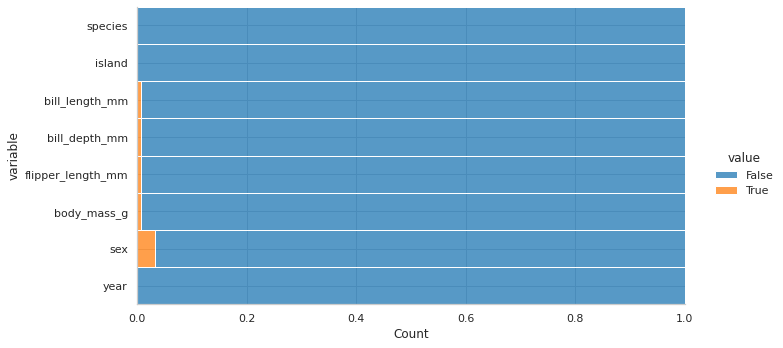

In [ ]:
(
    sns.displot(
    preprocess_penguins_df
    .isnull()
    .melt(),
    y = 'variable',
    hue = 'value',
    multiple = 'fill',
    aspect = 2
    )
)

<AxesSubplot: >

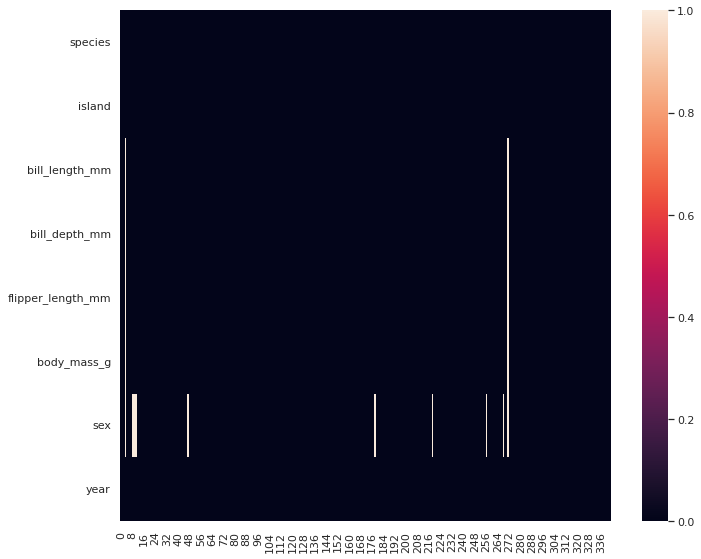

In [ ]:
(
    preprocess_penguins_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: (
            sns.heatmap(
                data= df
            )
        )
    )
)

##Eliminamos valores nulos y guardamos en un nuevo dataframe de datos procesados

In [ ]:
processed_penguins_df = (
    preprocess_penguins_df
    .dropna()
)

#Conteo y Tabulación

##Primero, describimos estadísticamente todas nuestras variables

In [ ]:
processed_penguins_df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


##Ahora solo las numéricas

In [ ]:
processed_penguins_df.describe(include=[np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


##Ahora las categóricas

In [ ]:
processed_penguins_df.describe(include='object')

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


#Vamos a graficar

##En Pandas

<AxesSubplot: >

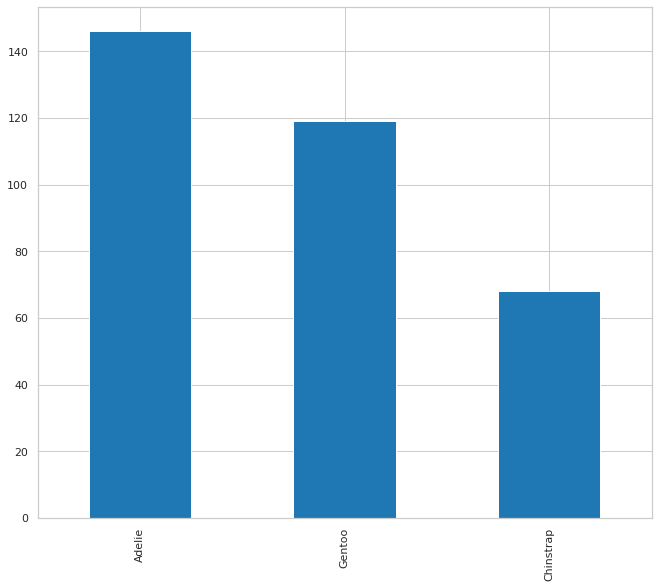

In [ ]:
(
    processed_penguins_df
    .species
    .value_counts()
    .plot(
        kind='bar'
    )
)

##En Seaborn

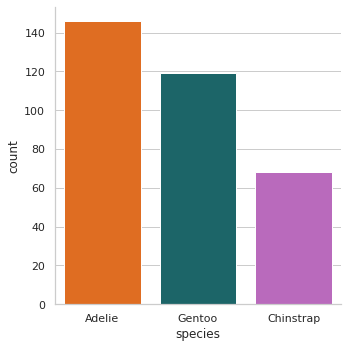

In [ ]:
sns.catplot(
    data=processed_penguins_df,
    x='species',
    kind='count',
    palette=penguin_color
)

<AxesSubplot: xlabel='species', ylabel='count'>

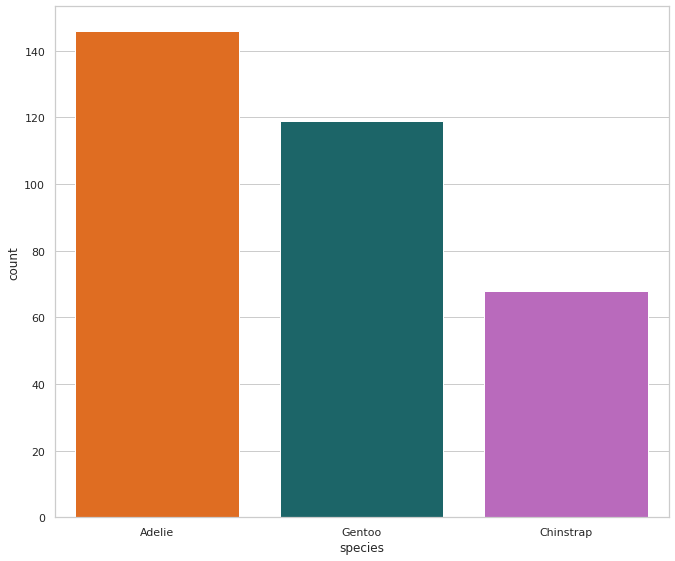

In [ ]:
(
    processed_penguins_df
    .value_counts('species', sort=True)
    .reset_index(name='count')
    .pipe(
       lambda df: (
           sns.barplot(
               data=df,
               x='species',
               y='count',
               palette=penguin_color
           )
       )
    )
)

###Proporciones

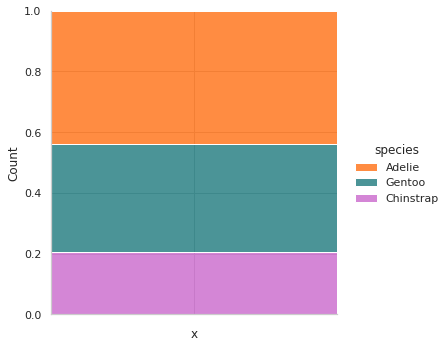

In [ ]:
(
    processed_penguins_df
    .add_column('x','')
    .pipe(
       lambda df: (
          sns.displot(
               data=df,
               x='x',
               hue='species',
               multiple='fill',
               palette=penguin_color
           )
       )
    )
)

##Vamos a aplicar este análisis a las otras dos variables categóricas

###Por sexo

<AxesSubplot: xlabel='sex', ylabel='count'>

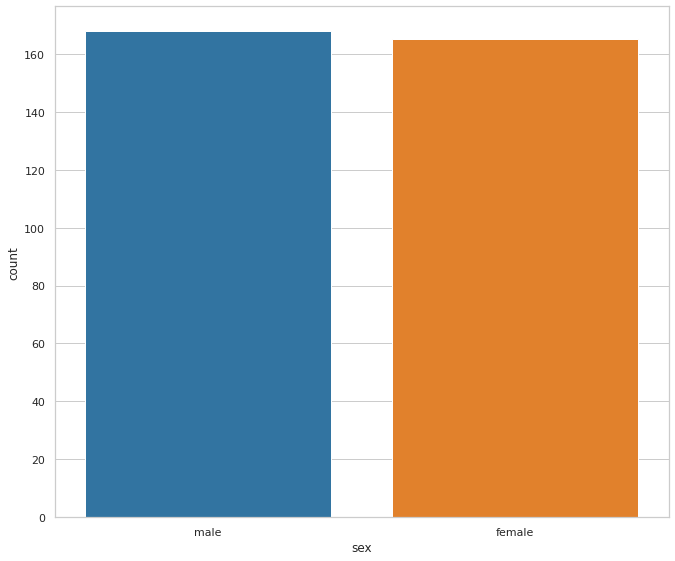

In [ ]:
(
    processed_penguins_df
    .value_counts('sex', sort=True)
    .reset_index(name='count')
    .pipe(
       lambda df: (
           sns.barplot(
               data=df,
               x='sex',
               y='count'
           )
       )
    )
)

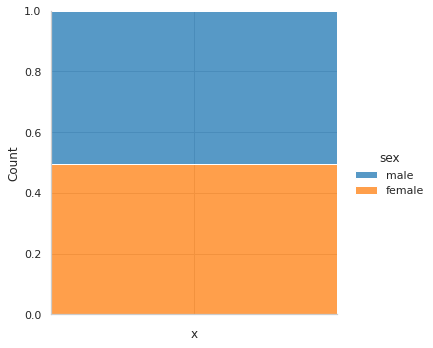

In [ ]:
(
    processed_penguins_df
    .add_column('x','')
    .pipe(
       lambda df: (
          sns.displot(
               data=df,
               x='x',
               hue='sex',
               multiple='fill'
           )
       )
    )
)

###Por isla

<AxesSubplot: xlabel='island', ylabel='count'>

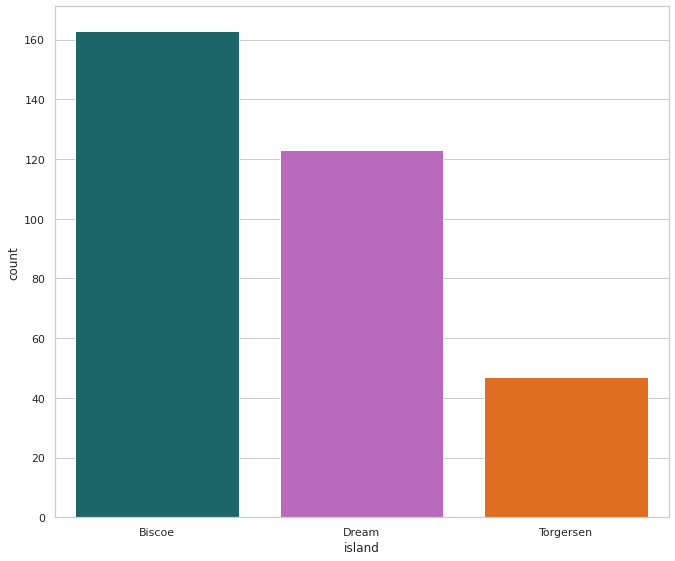

In [ ]:
(
    processed_penguins_df
    .value_counts('island', sort=True)
    .reset_index(name='count')
    .pipe(
       lambda df: (
           sns.barplot(
               data=df,
               x='island',
               y='count',
               palette=island_color
           )
       )
    )
)

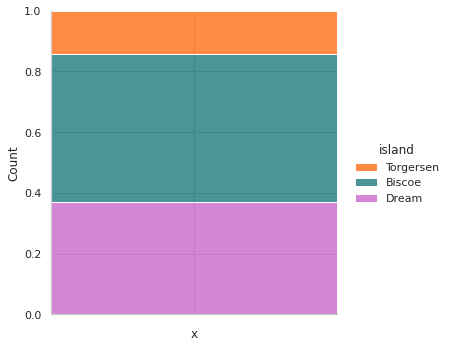

In [ ]:
(
    processed_penguins_df
    .add_column('x','')
    .pipe(
       lambda df: (
          sns.displot(
               data=df,
               x='x',
               hue='island',
               multiple='fill',
               palette=island_color
           )
       )
    )
)

#Medidad de tendencia central

## Media

In [ ]:
processed_penguins_df.bill_depth_mm.mean()

17.164864864864867

In [ ]:
np.mean(processed_penguins_df.bill_depth_mm)

17.164864864864867

In [ ]:
processed_penguins_df.mean()

<ipython-input-28-690398933604>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.mean()


bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

##Mediana

In [ ]:
processed_penguins_df.median()

<ipython-input-29-deb08da4cd61>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.median()


bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
dtype: float64

##Moda

In [ ]:
processed_penguins_df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


#Medidas de dispersión

##Valor máximo

In [ ]:
processed_penguins_df.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

##Valor mínimo

In [ ]:
processed_penguins_df.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

##Rango

In [ ]:
processed_penguins_df.max(numeric_only=True) - processed_penguins_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

##Desviación estándar

In [ ]:
processed_penguins_df.std()

<ipython-input-34-dbfc3293d15e>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.std()


bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

##Rango intercuartílico

In [ ]:
processed_penguins_df.quantile(0.75) - processed_penguins_df.quantile(0.25)

<ipython-input-35-f52d1be6a682>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.quantile(0.75) - processed_penguins_df.quantile(0.25)


bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [ ]:
(
    processed_penguins_df
    .quantile(q=[0.75, 0.50, 0.25])
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
        iqr=lambda df: df[0.75] - df[0.25]
    )
)

<ipython-input-36-f9d294968779>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df


,variable,0.75,0.5,0.25,iqr
0,bill_length_mm,48.6,44.5,39.5,9.1
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4775.0,4050.0,3550.0,1225.0
4,year,2009.0,2008.0,2007.0,2.0


##Distribuciones

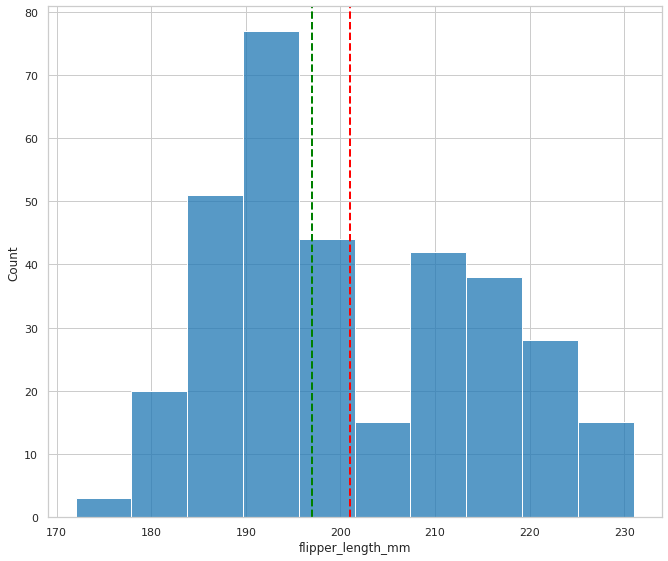

In [ ]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color='r',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.median(),
    color='g',
    linestyle='dashed',
    linewidth=2
)

<AxesSubplot: xlabel='flipper_length_mm'>

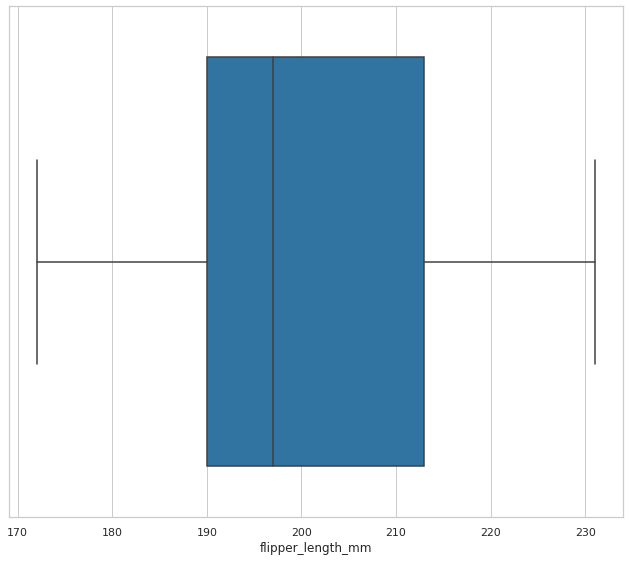

In [ ]:
sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)

#Distribuciones de Probabilidad

##Funciones de probabilidad de masas (PMFs)

###En Seaborn

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Probability'>

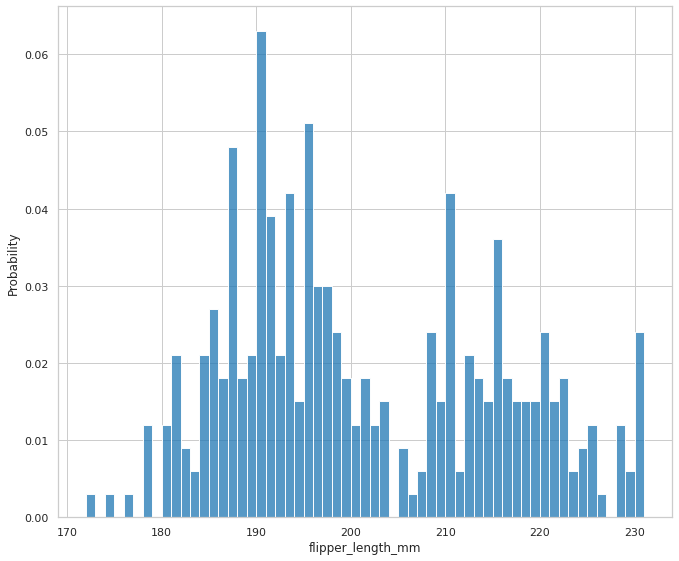

In [ ]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth=1,
    stat='probability'
)

###Con Empiricaldist

In [ ]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

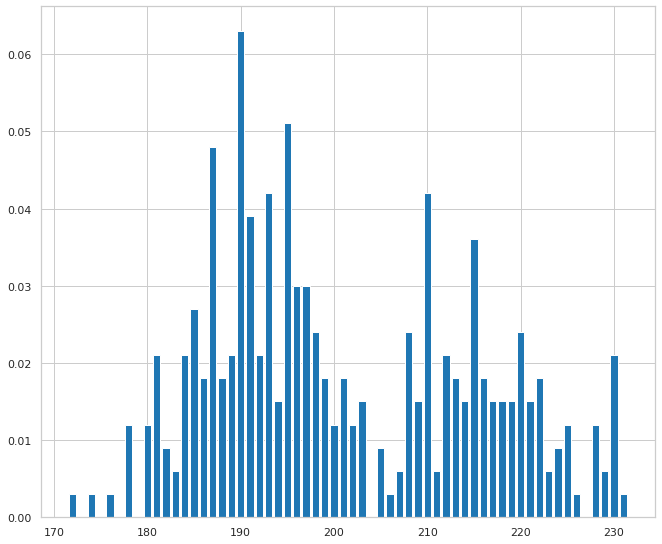

In [ ]:
pmf_flipper_length_mm.bar()

##Funciones empíricas de probabilidad acumulada (ECDFs)

###Con Seaborn

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

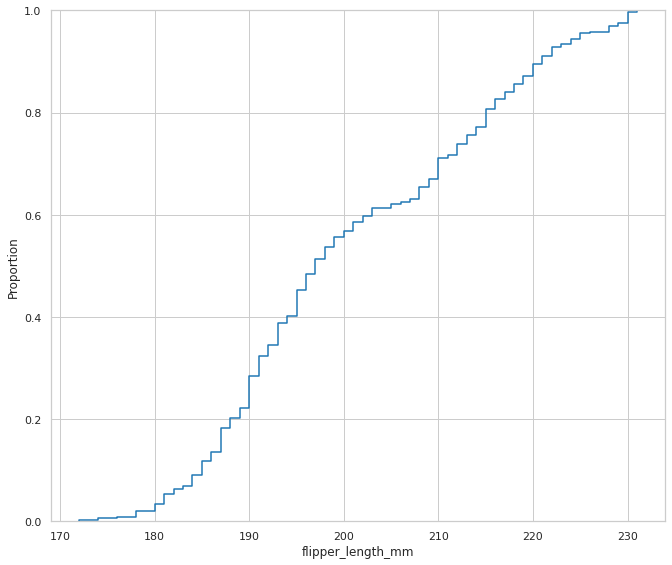

In [ ]:
sns.ecdfplot(
    processed_penguins_df,
    x='flipper_length_mm'
)

###Con Empiricaldist

In [ ]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

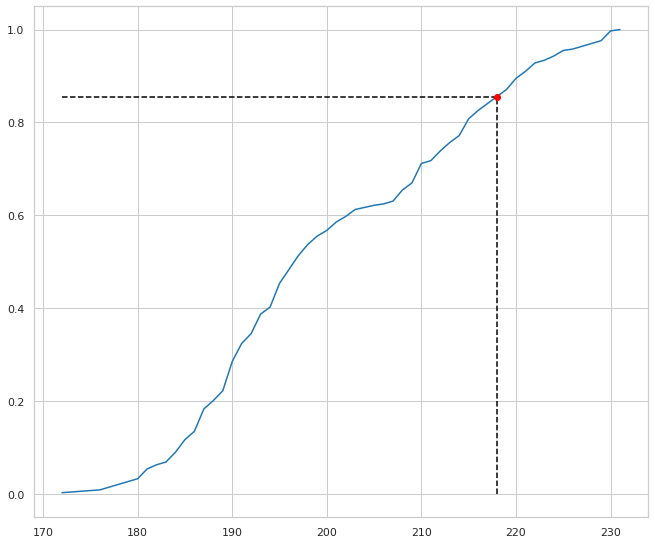

In [ ]:
cdf_flipper_length_mm.plot()

q = 218
p = cdf_flipper_length_mm.forward(q)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)

plt.plot(q,p, 'ro')

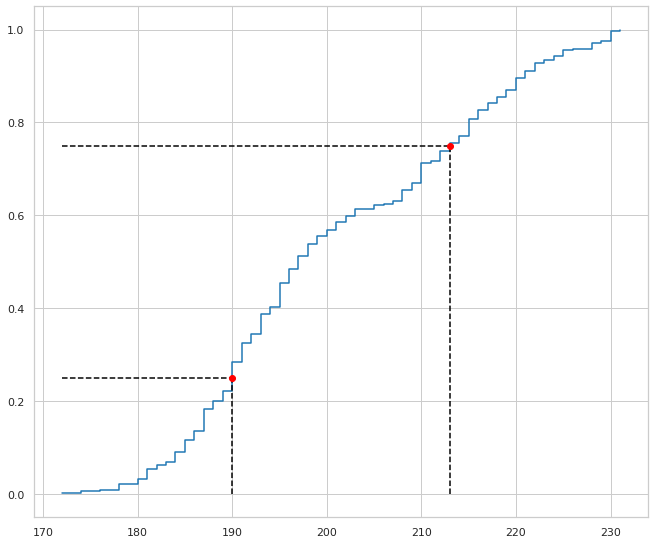

In [ ]:
cdf_flipper_length_mm.step ( )
p_1 = 0.25 # Specify probability
P_2 = 0.75
ps = ( 0.25 , 0.75 ) # IQR
qs = cdf_flipper_length_mm.inverse(ps)
plt.vlines (
    x = qs,
    ymin = 0,
    ymax=ps,
    color='black',
    linestyle='dashed'
)

plt.hlines(
   y=ps,
   xmin=pmf_flipper_length_mm.qs[0],
   xmax=qs,
   color='black',
   linestyle='dashed'
)

plt.scatter(
   x=qs,
   y=ps,
   color='red',
   zorder=2
)

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

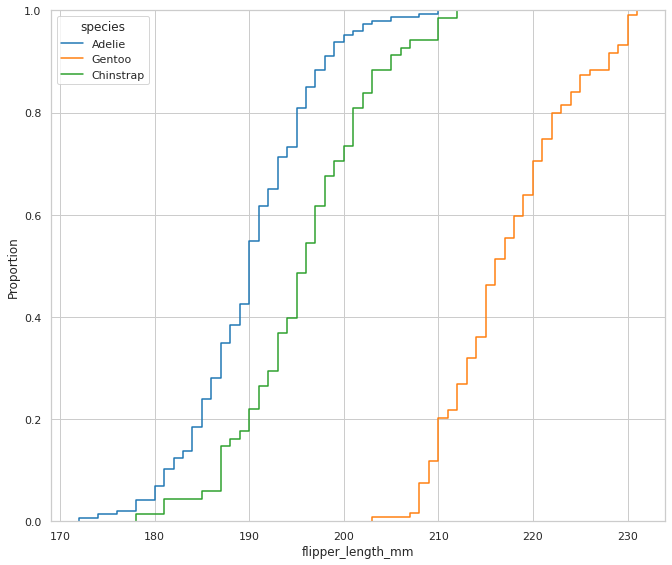

In [ ]:
sns.ecdfplot(
    data= processed_penguins_df,
    x='flipper_length_mm',
    hue='species'
)

##Funciones de densidad de probabilidad

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

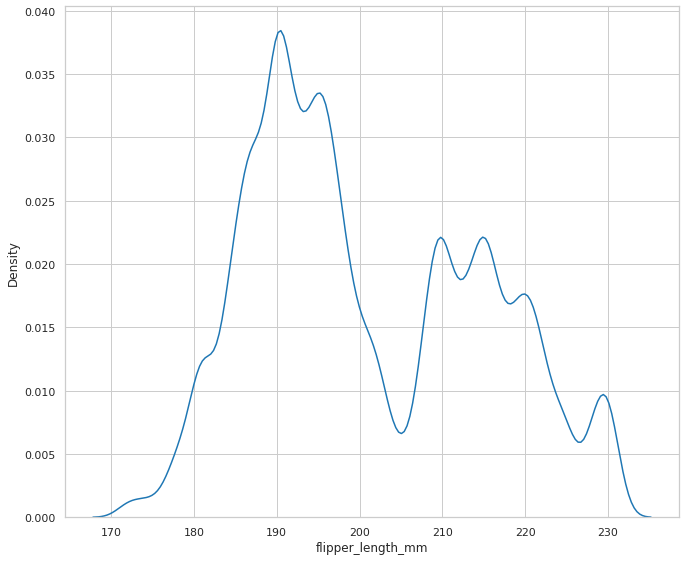

In [ ]:
sns.kdeplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    bw_method=0.1
)

In [ ]:
stats = processed_penguins_df.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

<AxesSubplot: >

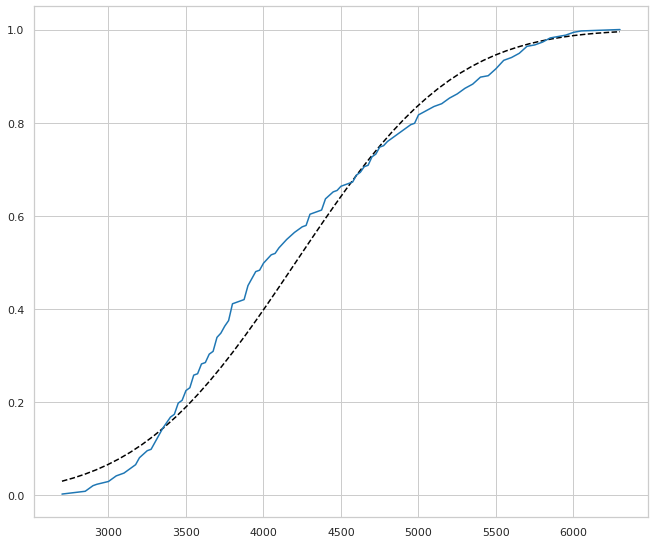

In [ ]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)


plt.plot(xs, ys, color='black', linestyle='dashed')

empiricaldist.Cdf.from_seq(
    processed_penguins_df.body_mass_g,
    normalize=True
).plot()

<AxesSubplot: xlabel='body_mass_g', ylabel='Density'>

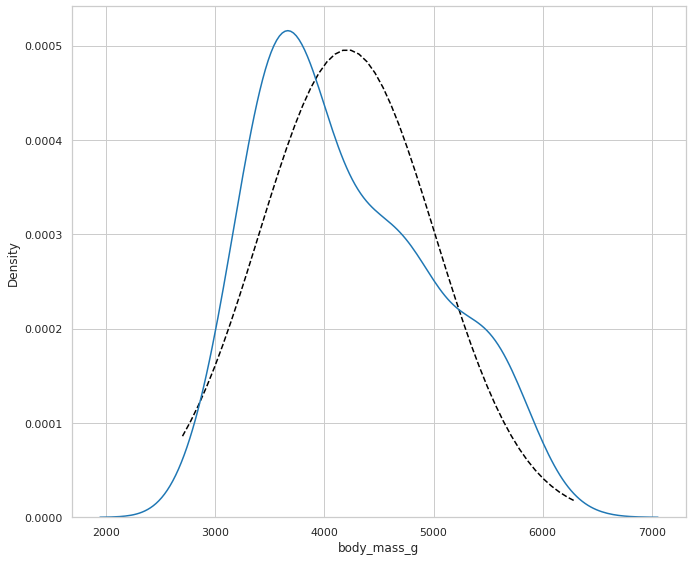

In [ ]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)


plt.plot(xs, ys, color='black', linestyle='dashed')

sns.kdeplot(
    data=processed_penguins_df,
    x='body_mass_g'
)

#Análisis Bivariable

##Gráficas de puntos

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

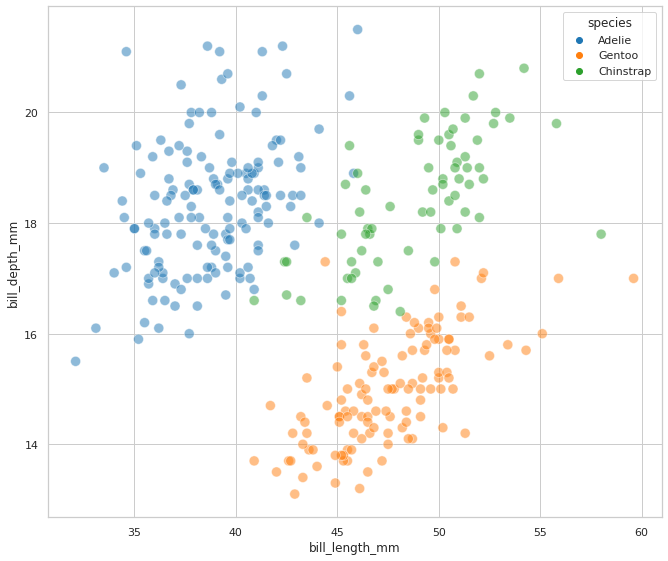

In [ ]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    alpha=1/2,
    s=100
)

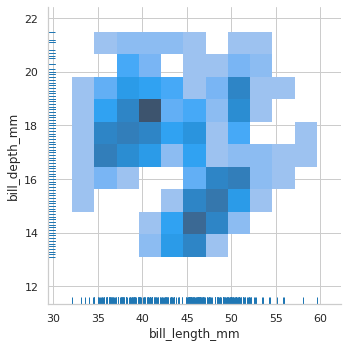

In [ ]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True 
)

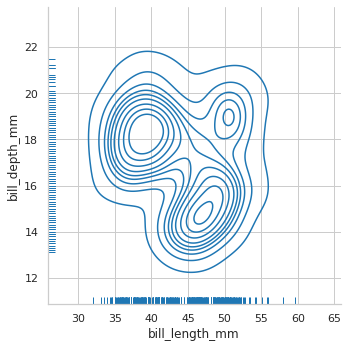

In [ ]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True,
    kind='kde' 
)

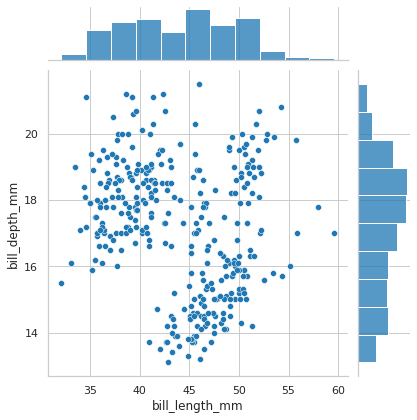

In [ ]:
sns.jointplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

##Gráficos de violín y boxplot

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

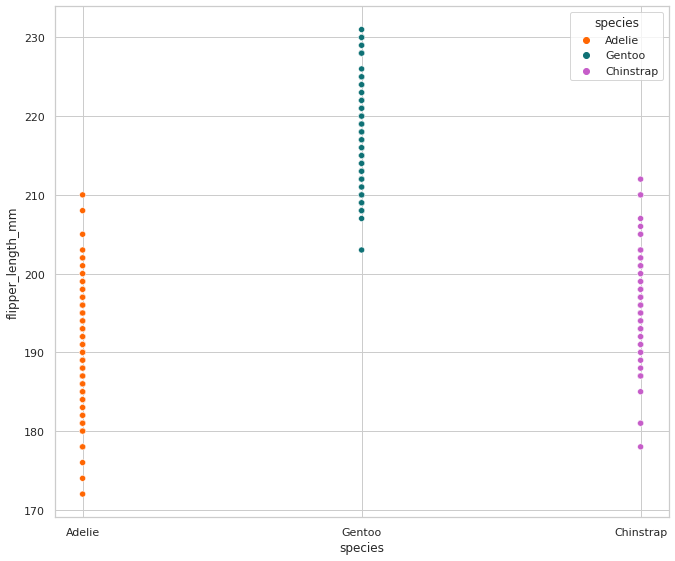

In [ ]:
sns.scatterplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color 
)

<ipython-input-56-f4bf52b52d4e>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(


<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

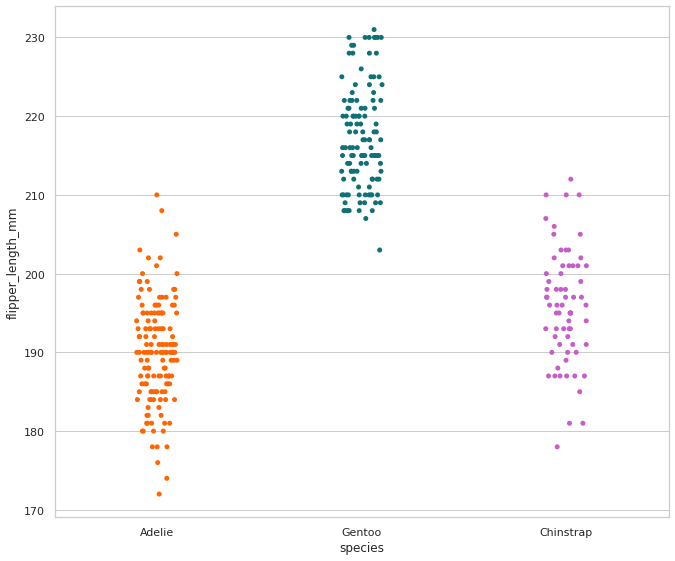

In [ ]:
sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    palette=penguin_color 
)

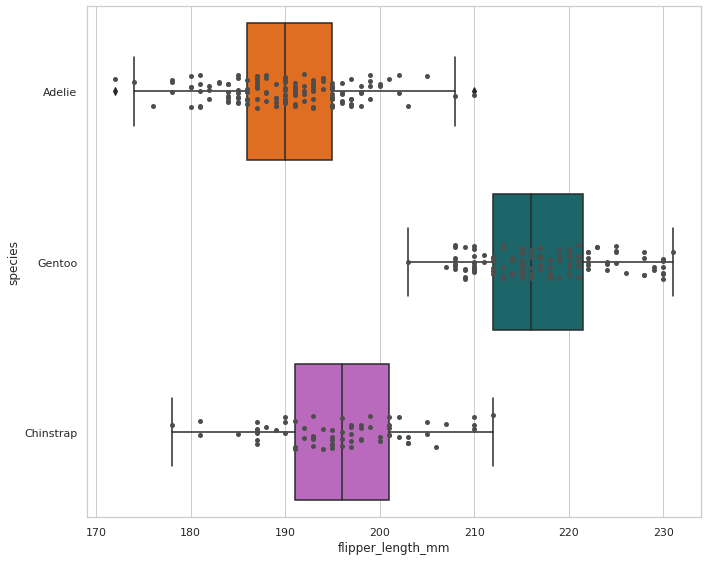

In [ ]:
ax = sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    palette=penguin_color
)

ax = sns.stripplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    color='.3'
)

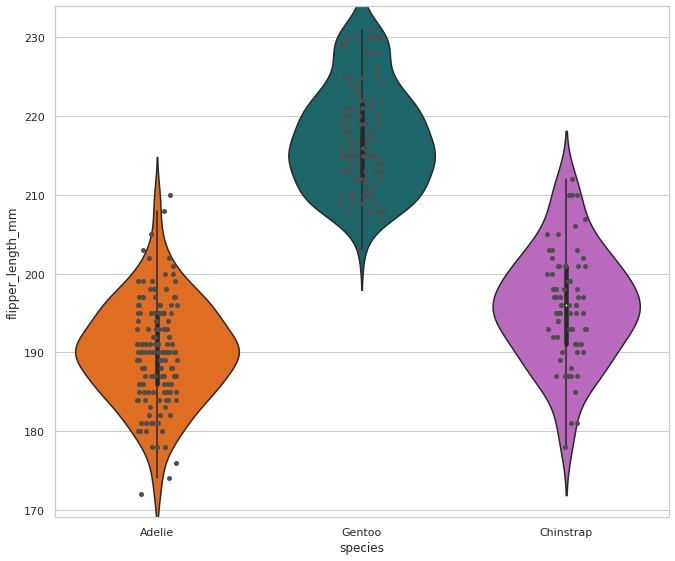

In [ ]:
ax = sns.violinplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    palette=penguin_color
)

ax = sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    color='.3'
)

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

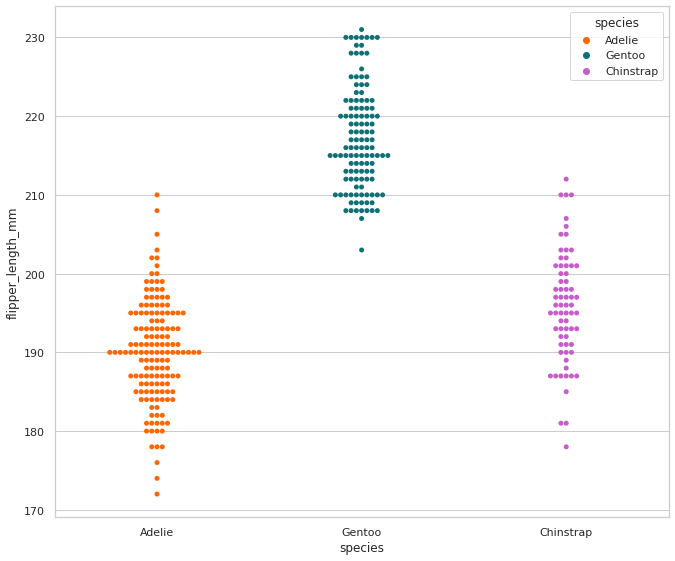

In [ ]:
sns.swarmplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

##Matrices de correlación

In [ ]:
processed_penguins_df.corr()

<ipython-input-60-54921e00cb11>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.corr()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


<ipython-input-61-1939e5773d05>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=processed_penguins_df.corr(),


<AxesSubplot: >

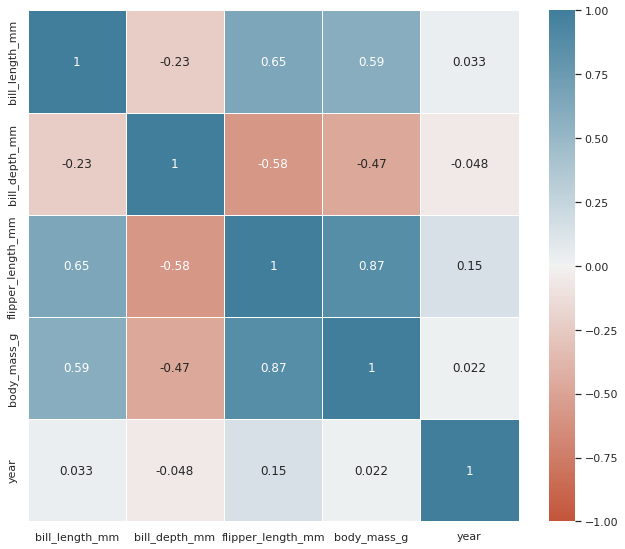

In [ ]:
sns.heatmap(
    data=processed_penguins_df.corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

<ipython-input-62-5966ea1374d0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=processed_penguins_df.corr(),


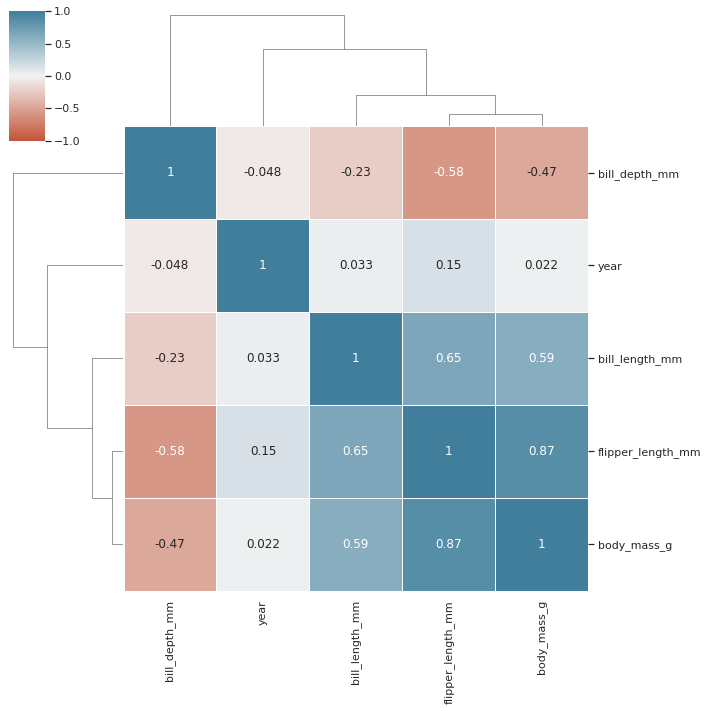

In [ ]:
sns.clustermap(
    data=processed_penguins_df.corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

##Análisis de regresión simple

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


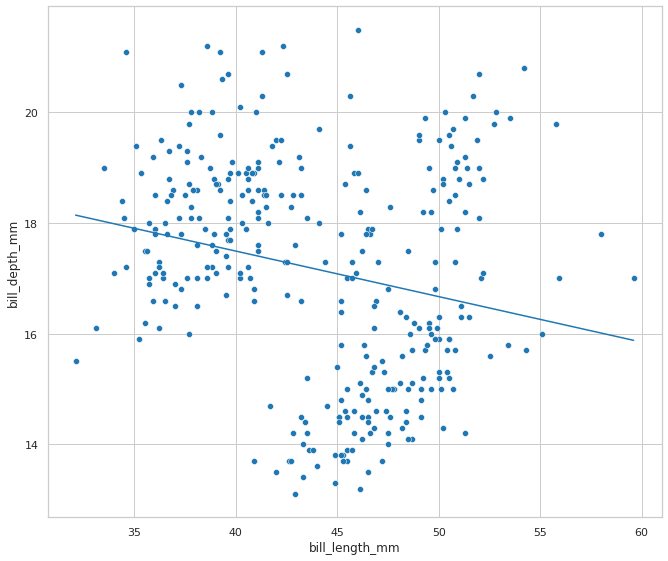

In [ ]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

res_penguis = scipy.stats.linregress(
    x=processed_penguins_df.bill_length_mm,
    y=processed_penguins_df.bill_depth_mm
)

print(res_penguis)

fx_1 = np.array([processed_penguins_df.bill_length_mm.min(), processed_penguins_df.bill_length_mm.max()])
fy_1 = res_penguis.intercept + res_penguis.slope * fx_1

plt.plot(fx_1, fy_1)

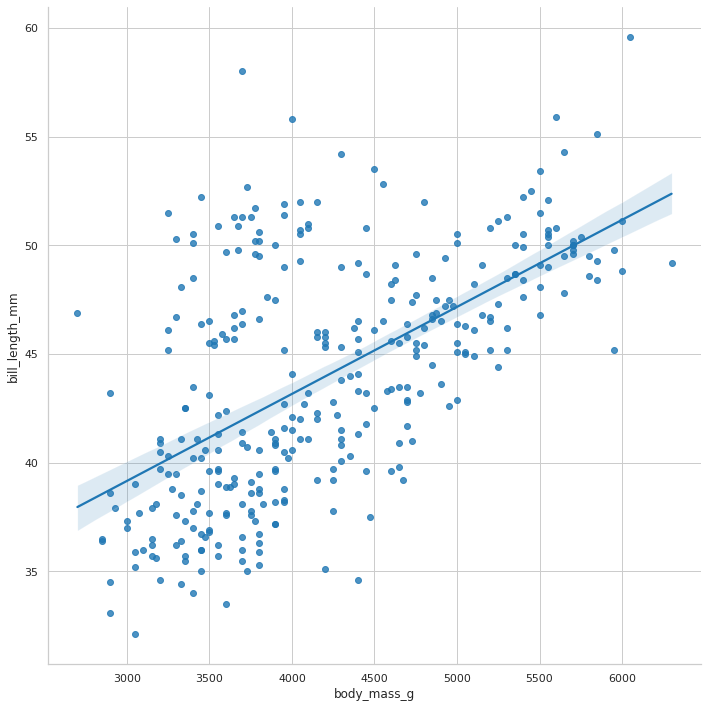

In [ ]:
sns.lmplot(
    data=processed_penguins_df,
    x='body_mass_g',
    y='bill_length_mm',
    height=10
)

##La regrisón lineal no siempre es simétrica

In [ ]:
x = processed_penguins_df.bill_length_mm
y = processed_penguins_df.bill_depth_mm

res_x_y = scipy.stats.linregress(x=x, y=y)
res_y_x = scipy.stats.linregress(x=y, y=x)

print(res_x_y, res_y_x, sep='\n')

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)
LinregressResult(slope=-0.6349051704195019, intercept=54.89085424504755, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.1485977821662331, intercept_stderr=2.5673415135382553)


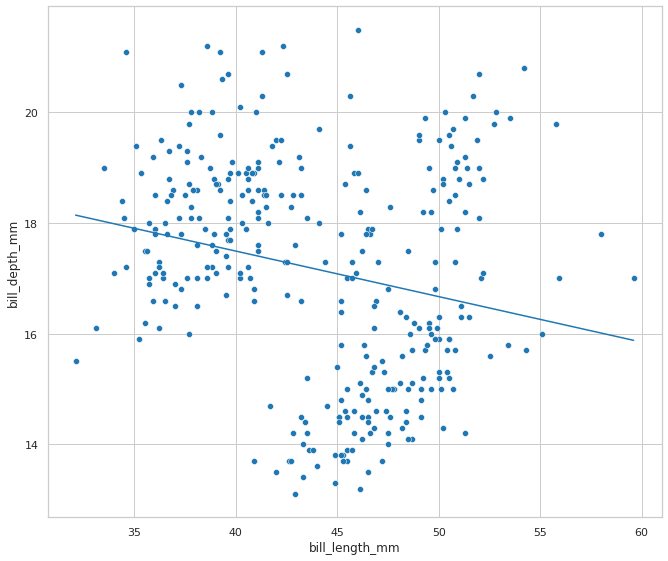

In [ ]:
sns.scatterplot(
    x=x,
    y=y
)

fx_1= np.array([x.min(), x.max()])
fy_1= res_x_y.intercept + res_x_y.slope * fx_1

plt.plot(fx_1, fy_1)

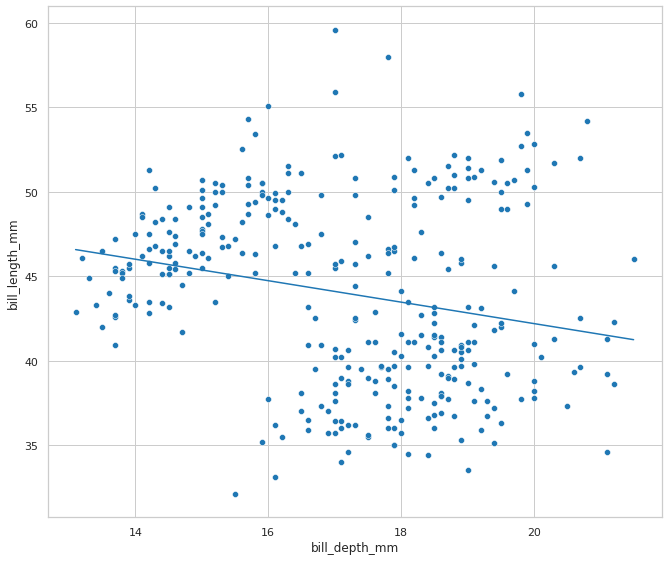

In [ ]:
sns.scatterplot(
    x=y,
    y=x
)

fx_2= np.array([y.min(), y.max()])
fy_2= res_y_x.intercept + res_y_x.slope * fx_2

plt.plot(fx_2, fy_2)

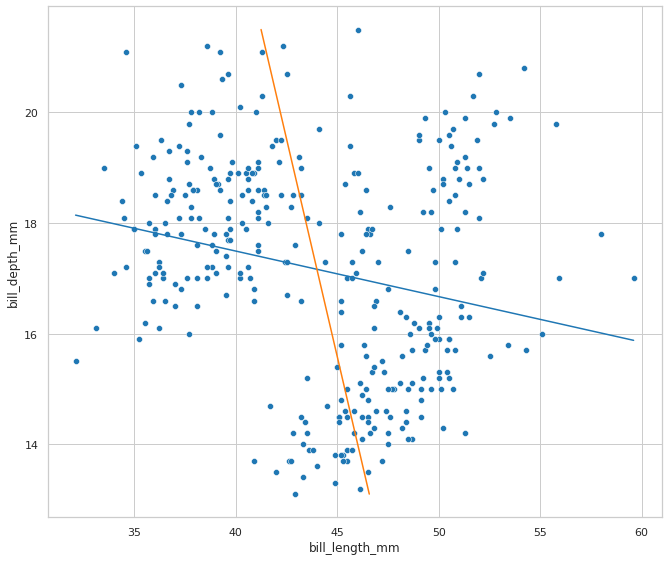

In [ ]:
sns.scatterplot(
    x=x,
    y=y
)

plt.plot(fx_1, fy_1)
plt.plot(fy_2, fx_2)

#Análisis Multivariado

##Análisis de regresión múltiple

###Modelo 1

In [ ]:
model_1 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm',
        data=processed_penguins_df
    )
    .fit()
)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           1.54e-32
Time:                        15:00:15   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###Modelo 2

In [ ]:
model_2 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm',
        data=processed_penguins_df
    )
    .fit()
)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           7.04e-46
Time:                        15:02:13   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###Modelo 3

In [ ]:
model_3 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm',
        data=processed_penguins_df
    )
    .fit()
)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          9.26e-103
Time:                        15:04:40   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###Modelo 4

In [ ]:
model_4 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)',
        data=processed_penguins_df
    )
    .fit()
)

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          6.28e-122
Time:                        15:07:57   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###Modelo 5

In [ ]:
model_5 = (
    smf.ols(
        formula='body_mass_g ~ flipper_length_mm + C(sex)',
        data=processed_penguins_df
    )
    .fit()
)

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          3.53e-118
Time:                        15:15:33   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Visualizando reslturados

###Tabla de resultados

In [ ]:
model_results = pd.DataFrame(
    dict(
        actual_value=processed_penguins_df.body_mass_g,
        prediction_model_1 = model_1.predict(),
        prediction_model_2 = model_2.predict(),
        prediction_model_3 = model_3.predict(),
        prediction_model_4 = model_4.predict(),
        prediction_model_5 = model_5.predict(),
        species=processed_penguins_df.species,
        sex=processed_penguins_df.sex 
    )
)

model_results

,actual_value,prediction_model_1,prediction_model_2,prediction_model_3,prediction_model_4,prediction_model_5,species,sex
0,3750.0,3782.402961,3617.641192,3204.761227,3579.136946,3441.323750,Adelie,male
1,3800.0,3817.119665,3836.725580,3436.701722,3343.220772,3328.384372,Adelie,female
2,3250.0,3886.553073,3809.271371,3906.897032,3639.137335,3751.223949,Adelie,female
4,3450.0,3574.102738,3350.786581,3816.705772,3457.954243,3657.259599,Adelie,female
5,3650.0,3799.761313,3356.140070,3696.168128,3764.536023,3864.163327,Adelie,male
...,...,...,...,...,...,...,...,...
339,4000.0,5231.825347,4706.954140,4599.187485,4455.022405,4662.860306,Chinstrap,male
340,3400.0,4164.286703,4034.121055,4274.552753,3894.857519,4080.099176,Chinstrap,female
341,3775.0,4693.716437,4475.927353,3839.563668,4063.639819,4005.109853,Chinstrap,male
342,4100.0,4797.866549,4449.296758,4720.740455,4652.013882,4803.806832,Chinstrap,male


###ECDFs

<AxesSubplot: ylabel='Proportion'>

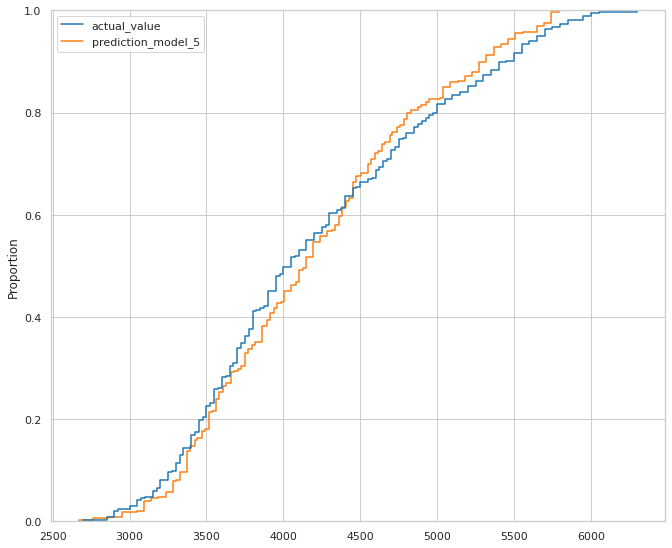

In [ ]:
sns.ecdfplot(
    data=model_results.select_columns(['actual_value', 'prediction_model_5'])
)

###PDFs

<AxesSubplot: ylabel='Density'>

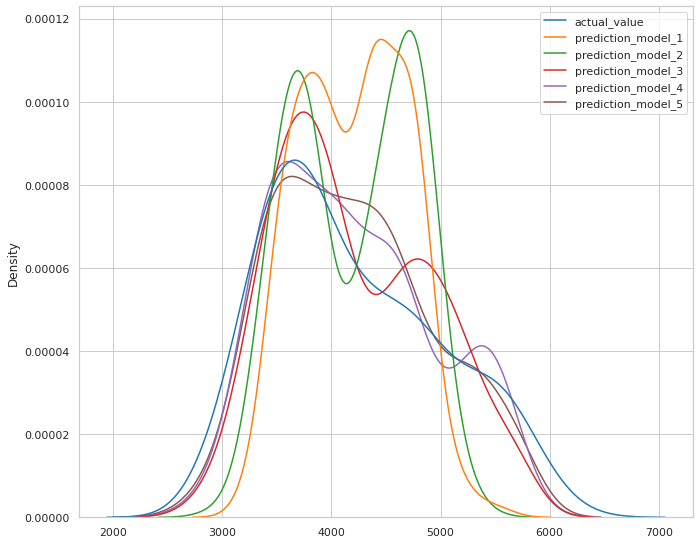

In [ ]:
sns.kdeplot(
    data=model_results
)

##Análisis de regresión logística

In [ ]:
processed_penguins_df = (
    processed_penguins_df
    .assign(numeric_sex=lambda df: df.sex.replace(['male', 'female'],[1,0]))
)

In [ ]:
smf.logit(
    formula='numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
    data=processed_penguins_df
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.4793
Time:                        16:00:53   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

###Explorando las variables categóricas

In [ ]:
(
    processed_penguins_df.
    value_counts(['island', 'sex']).
    reset_index(name='count')
)

,island,sex,count
0,Biscoe,male,83
1,Biscoe,female,80
2,Dream,male,62
3,Dream,female,61
4,Torgersen,female,24
5,Torgersen,male,23


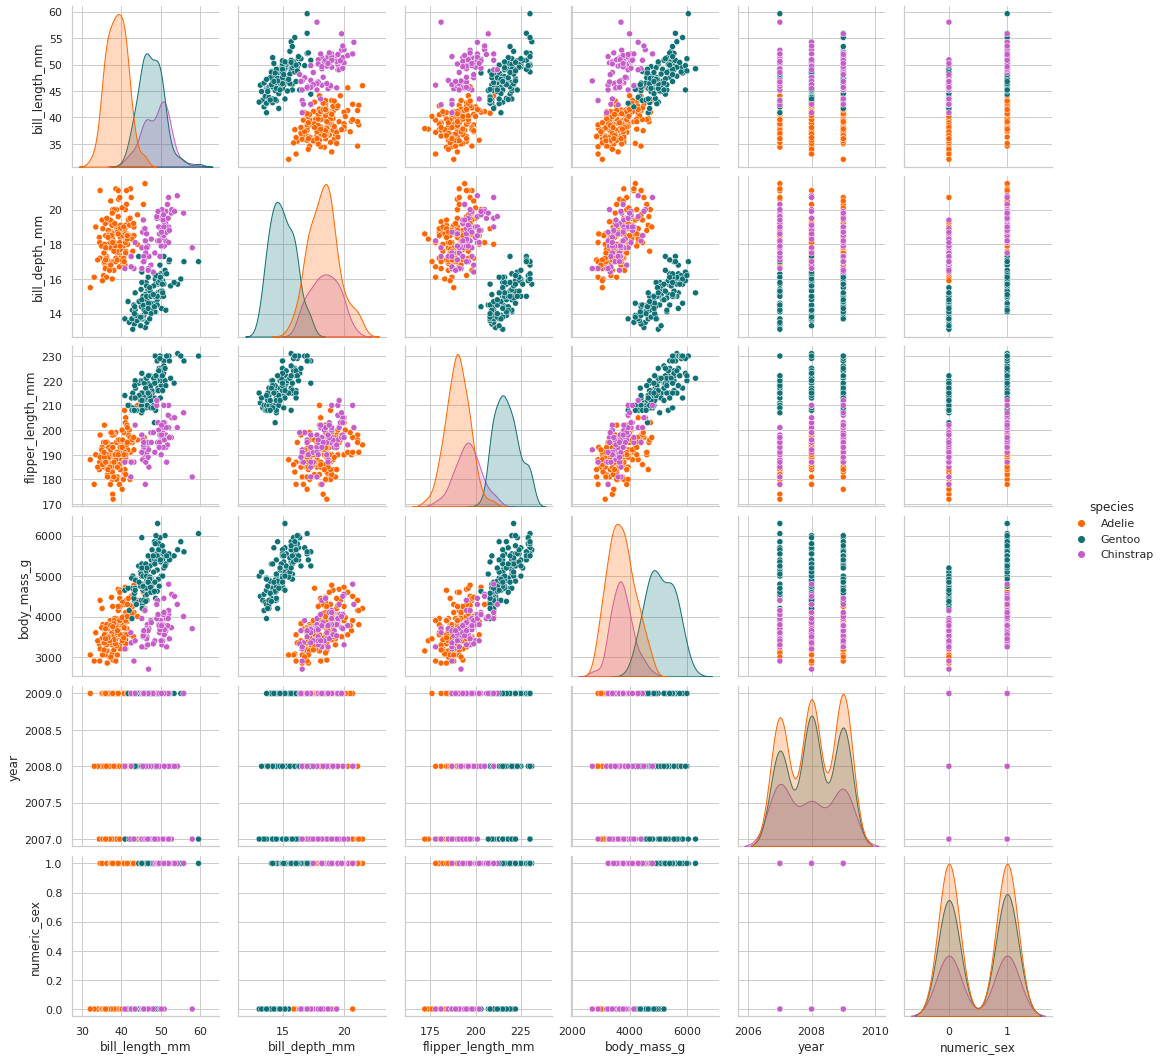

In [ ]:
sns.pairplot(
    data=processed_penguins_df,
    hue='species',
    palette=penguin_color
)